In [1]:
# 기본
import pandas as pd
import numpy as np

# 데이터 분할
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, KFold

# 모델링
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor

from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import  SMOTETomek

# 스코어링
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

# 베이지안옵티마이제이션
from bayes_opt import BayesianOptimization

In [34]:
part_one_iter_train = pd.read_csv('data/part/one-hot_encoding/iterative/part_one_iter_train.csv')
label = pd.read_csv('data/raw_label.csv')
test = pd.read_csv('data/one_hot_test.csv')

part_train_x = np.array(part_one_iter_train)
train_y = np.array(label)

In [35]:
# Data split
x_train, x_val, y_train, y_val = train_test_split(part_train_x, train_y, test_size = 0.3, 
                                                  random_state = 17, stratify = train_y)

In [47]:
# Oversampling
tomek = SMOTETomek(random_state = 17, n_jobs = -1)
tomek_x_train, tomek_y_train = tomek.fit_sample(x_train, y_train)
tomek_x_train = pd.DataFrame(tomek_x_train, columns = part_one_iter_train.columns)
print(tomek_x_train.shape, tomek_y_train.shape)

(17868, 53) (17868,)


,ANONYMOUS_1,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,2435.000000,17.000000,200.000000,0.0,0.000000,1.000000,0.000000,0.0,18.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,1339.000000,4.000000,539.000000,0.0,0.000000,20.000000,0.000000,0.0,155.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000
2,1732.000000,8.000000,932.000000,0.0,0.000000,18.000000,1.000000,0.0,140.000000,0.0,...,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,2005.000000,3.000000,200.000000,0.0,0.000000,179.000000,0.000000,0.0,131.000000,0.0,...,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,1405.000000,23.000000,605.000000,0.0,0.000000,15.000000,0.000000,0.0,112.000000,0.0,...,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17863,5593.762942,8.174180,200.000000,0.0,2.412910,5.000000,0.825820,0.0,2226.185394,0.0,...,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
17864,2877.465983,2.000000,392.975087,0.0,335.226855,101.837113,2.756787,0.0,57.420975,0.0,...,0.000000,0.0,0.606173,0.0,0.000000,0.0,0.0,0.0,0.0,0.393827
17865,4541.948521,7.859594,200.000000,0.0,176.152872,72.989074,0.929797,0.0,26.859594,0.0,...,0.535101,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
17866,1387.953304,4.673048,468.375169,0.0,90.718222,1.224349,3.551302,0.0,45.749620,0.0,...,0.224349,0.0,0.000000,0.0,0.775651,0.0,0.0,0.0,0.0,0.000000


In [53]:
pd.DataFrame(tomek_x_train, columns = part_one_iter_train.columns).loc[:,test.columns]

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,2435.000000,200.000000,0.0,0.0,1.000000,13.000000,30.000000,0.000000,0.000000,230.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,1339.000000,539.000000,0.0,0.0,2.000000,0.000000,193.000000,0.000000,5.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000
2,1732.000000,932.000000,0.0,0.0,3.000000,22.000000,49.000000,0.000000,2.000000,43.000000,...,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,2005.000000,200.000000,0.0,0.0,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,1405.000000,605.000000,0.0,0.0,0.000000,2.000000,16.000000,0.000000,0.000000,26.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17863,5593.762942,200.000000,0.0,0.0,2.064550,135.847412,320.230697,0.000000,4.129101,13.741799,...,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
17864,2877.465983,392.975087,0.0,0.0,14.845668,4.969134,1106.743030,0.218148,14.695054,0.787653,...,0.000000,0.0,0.606173,0.0,0.000000,0.0,0.0,0.0,0.0,0.393827
17865,4541.948521,200.000000,0.0,0.0,0.535101,406.926644,31.903275,0.000000,1.000000,36.351014,...,0.535101,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
17866,1387.953304,468.375169,0.0,0.0,0.000000,4.551302,3.551302,0.000000,0.000000,0.000000,...,0.224349,0.0,0.000000,0.0,0.775651,0.0,0.0,0.0,0.0,0.000000


In [52]:
pd.DataFrame(x_val, columns = part_one_iter_train.columns).loc[:,test.columns]

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,3623.0,200.0,0.0,0.0,0.0,2.0,102.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4678.0,200.0,0.0,0.0,0.0,5.0,93.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5038.0,200.0,0.0,0.0,0.0,0.0,60.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1909.0,853.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2031.0,200.0,0.0,0.0,0.0,79.0,5.0,0.0,0.0,226.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,2913.0,200.0,0.0,0.0,1.0,3.0,16.0,0.0,0.0,56.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4225,12735.0,200.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4226,1658.0,200.0,0.0,0.0,1.0,156.0,48.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4227,6226.0,200.0,0.0,0.0,3.0,6.0,50.0,0.0,1.0,39.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [2]:
total_one_iter_train = pd.read_csv('data/total/one-hot_encoding/iterative/total_one_iter_train.csv')
part_one_iter_train = pd.read_csv('data/part/one-hot_encoding/iterative/part_one_iter_train.csv')
label = pd.read_csv('data/raw_label.csv')
test = pd.read_csv('data/one_hot_test.csv')

total_train_x = np.array(total_one_iter_train)
part_train_x = np.array(part_one_iter_train)
train_y = np.array(label)
train_s = np.array(part_one_iter_train.loc[:,test.columns])

# Task1 : 확률값의 target 만들기

In [3]:
# Total data split
total_x_train, total_x_val, total_y_train, total_y_val = train_test_split(total_train_x, train_y, test_size = 0.3, 
                                                                          random_state = 17, stratify = train_y)

# Part data split
part_x_train, part_x_val, part_y_train, part_y_val = train_test_split(part_train_x, train_y, test_size = 0.3, 
                                                                      random_state = 17, stratify = train_y)

In [4]:
# Total Oversampling
svm = SVMSMOTE(random_state = 17, n_jobs = -1)
total_svm_x_train, total_svm_y_train = svm.fit_sample(total_x_train, total_y_train)
print(total_svm_x_train.shape, total_svm_y_train.shape)

tomek = SMOTETomek(random_state = 17, n_jobs = -1)
total_tomek_x_train, total_tomek_y_train = tomek.fit_sample(total_x_train, total_y_train)
print(total_tomek_x_train.shape, total_tomek_y_train.shape)

# Part Oversampling
svm = SVMSMOTE(random_state = 17, n_jobs = -1)
part_svm_x_train, part_svm_y_train = svm.fit_sample(part_x_train, part_y_train)
print(part_svm_x_train.shape, part_svm_y_train.shape)

tomek = SMOTETomek(random_state = 17, n_jobs = -1)
part_tomek_x_train, part_tomek_y_train = tomek.fit_sample(part_x_train, part_y_train)
print(part_tomek_x_train.shape, part_tomek_y_train.shape)

(18048, 70) (18048,)
(16994, 70) (16994,)
(18048, 53) (18048,)
(17868, 53) (17868,)


In [33]:
part_one_iter_train.loc[:,test.columns].shape

(14095, 36)

In [5]:
train_lst = [total_svm_x_train, total_tomek_x_train, part_svm_x_train, part_tomek_x_train]
label_lst = [total_svm_y_train, total_tomek_y_train, part_svm_y_train, part_tomek_y_train]

In [10]:
pbounds = { 'learning_rate': (0.001, 1.5),
            'n_estimators': (50, 400),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'colsample_bytree': (0.75,0.9),   
            'num_leaves': (2,10),
            'min_child_weight': (1, 7)}


def lgbm_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1
    }
    
    lgbm = LGBMClassifier(**params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=True, random_state=17)

    score = cross_val_score(lgbm, part_svm_x_train, part_svm_y_train, scoring='f1_macro', cv=skf, n_jobs=-1)
    
    return np.mean(score)

In [11]:
def lgbm_opt2(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1
    }
    
    lgbm = LGBMClassifier(**params)
    
    skf = StratifiedKFold(n_splits=3 , shuffle=True, random_state=8)

    score = cross_val_score(lgbm, total_svm_x_train, total_svm_y_train, scoring='f1_macro', cv=skf, n_jobs=-1)
    
    return np.mean(score)

In [12]:
BO_lgbm1 = BayesianOptimization(f = lgbm_opt, pbounds = pbounds, random_state=17)
BO_lgbm2 = BayesianOptimization(f = lgbm_opt2, pbounds = pbounds, random_state=17)

BO_lgbm1.maximize(init_points=10, n_iter=10)
BO_lgbm2.maximize(init_points=10, n_iter=10)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.9717    | 0.7942    | 0.7963    | 4.341     | 1.407     | 325.4     | 7.251     | 0.8956    |
| 2         | 0.957     | 0.8363    | 0.05956   | 5.505     | 6.674     | 71.02     | 8.912     | 0.9316    |
| 3         | 0.9677    | 0.7577    | 0.979     | 6.862     | 4.585     | 219.2     | 4.264     | 0.8447    |
| 4         | 0.9723    | 0.8342    | 0.5947    | 8.521     | 3.511     | 100.4     | 3.207     | 0.8083    |
| 5         | 0.9738    | 0.8577    | 0.4392    | 4.391     | 5.988     | 248.8     | 2.659     | 0.8817    |
| 6         | 0.9699    | 0.7738    | 1.015     | 3.829     | 3.67      | 360.8     | 8.378     | 0.8102    |
| 7         | 0.9702    | 0.8941    | 0.9891    | 8.031     | 5.461     | 360.7     | 3.072     | 0.9165    |
| 8       

In [13]:
max_params = BO_lgbm1.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['num_leaves'] = int(round(max_params['num_leaves']))

max_params2 = BO_lgbm2.max['params']

max_params2['n_estimators'] = int(round(max_params2['n_estimators']))
max_params2['max_depth'] = int(round(max_params2['max_depth']))
max_params2['num_leaves'] = int(round(max_params2['num_leaves']))

In [16]:
lgbm_clf1 = LGBMClassifier(**max_params)
lgbm_clf2 = LGBMClassifier(**max_params2)

In [18]:
lgbm_clf1.fit(part_x_train, part_y_train)
lgbm_clf2.fit(total_x_train, total_y_train)

C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y wa

LGBMClassifier(colsample_bytree=0.7693064343325003,
               learning_rate=0.20868207546041753, max_depth=4,
               min_child_weight=5.8752504824012926, n_estimators=184,
               num_leaves=9, subsample=0.8523598953618494)

In [19]:
clf1_predict = lgbm_clf1.predict(part_x_val)
clf2_predict = lgbm_clf2.predict(total_x_val)

In [20]:
clf1_score = f1_score(part_y_val,clf1_predict)
clf2_score = f1_score(total_y_val,clf2_predict)

In [26]:
print(f'1번성능 : {clf1_score}\n2번성능 : {clf2_score}')

1번성능 : 0.6654740608228981
2번성능 : 0.6536412078152753


In [29]:
print(f'Catboost F1 score : {clf1_score}\nXGB F1 score : {clf2_score}\nLGBM F1 score : {clf2_score}')
print(f'ExtraTrees F1 score : {clf2_score}\nLogistic F1 score : {clf2_score}')

Catboost F1 score : 0.6654740608228981
XGB F1 score : 0.6536412078152753
LGBM F1 score : 0.6536412078152753
ExtraTrees F1 score : 0.6536412078152753
Logistic F1 score : 0.6536412078152753


In [24]:
from sklearn.metrics import classification_report
print(classification_report(part_y_val, clf1_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3868
           1       0.94      0.52      0.67       361

    accuracy                           0.96      4229
   macro avg       0.95      0.76      0.82      4229
weighted avg       0.96      0.96      0.95      4229



In [64]:
print(f'Catboost F1 score : {clf2_score}\n',classification_report(part_y_val, clf2_predict))
print(f'Catboost F1 score : {clf2_score}\n',classification_report(part_y_val, clf2_predict))
print(f'Catboost F1 score : {clf2_score}\n',classification_report(part_y_val, clf2_predict))

Catboost F1 score : 0.6536412078152753
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3868
           1       0.91      0.51      0.65       361

    accuracy                           0.95      4229
   macro avg       0.93      0.75      0.81      4229
weighted avg       0.95      0.95      0.95      4229

Catboost F1 score : 0.6536412078152753
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3868
           1       0.91      0.51      0.65       361

    accuracy                           0.95      4229
   macro avg       0.93      0.75      0.81      4229
weighted avg       0.95      0.95      0.95      4229

Catboost F1 score : 0.6536412078152753
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3868
           1       0.91      0.51      0.65       361

    accuracy                           0.95      4229
   macro

In [54]:
skf = StratifiedKFold(n_splits=4 , shuffle=True, random_state=50)
scores = cross_val_score(lgbm_clf, train_x, train_y, scoring='f1_macro', cv=skf, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

[0.97526501 0.97476707 0.97707929 0.97559454]
최대성능: 0.9770792888869317
평균성능: 0.975676479302218


In [55]:
lgbm_clf.fit(train_x, train_y)

C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(colsample_bytree=0.8016049337505082,
               learning_rate=0.11254238225195119, max_depth=9,
               min_child_weight=4.218390651158562, n_estimators=384,
               num_leaves=7, subsample=0.9416242188134849)

In [30]:
lgbm_pred = lgbm_clf1.predict_proba(train_x) ;lgbm_pred

NameError: name 'train_x' is not defined

In [57]:
train_y_pred1 =  np.array([i[1] for i in lgbm_pred])

In [58]:
train_y_pred1

array([0.0057206 , 0.0163682 , 0.99110755, ..., 0.99576893, 0.97827357,
       0.99524872])

In [59]:
train_y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

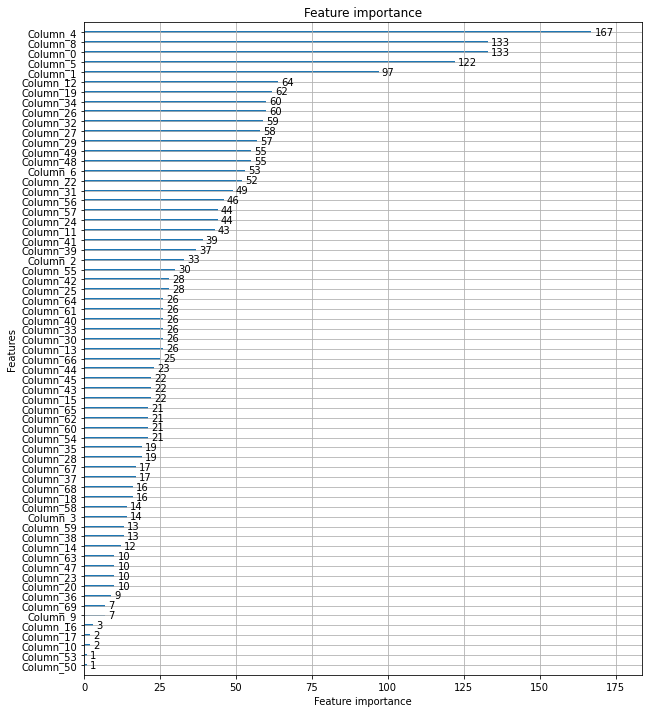

In [60]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf, ax=ax)

# Task2 : 부분 train을 활용해 확률값의 target 예측 모델링

In [61]:
# 학습데이터 70%, 평가데이터 30%로 데이터 분할
X_train2, X_dev2, y_train2, y_dev2 = train_test_split(train_s, train_y_pred1, test_size = 0.3, random_state = 17, stratify = train_y)

In [62]:
pbounds = { 'learning_rate': (0.001, 1.5),
            'n_estimators': (50, 400),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'colsample_bytree': (0.75,0.9),   
            'num_leaves': (2,10),
            'min_child_weight': (1, 7)}


def lgbm_opt2(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1
    }
    
    lgbm_2 = LGBMRegressor(**params)
    
    skf_2 = KFold(n_splits=4 , shuffle=True, random_state=50)

    score_2 = cross_val_score(lgbm_2, X_train2, y_train2, scoring='neg_mean_squared_error', cv=skf_2, n_jobs=-1)
    
    return np.mean(score_2)

BO_lgbm2 = BayesianOptimization(f = lgbm_opt2, pbounds = pbounds, random_state=17)    

BO_lgbm2.maximize(init_points=50, n_iter=150)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.01207  | 0.7942    | 0.7963    | 4.341     | 1.407     | 325.4     | 7.251     | 0.8956    |
| 2         | -0.02232  | 0.8363    | 0.05956   | 5.505     | 6.674     | 71.02     | 8.912     | 0.9316    |
| 3         | -0.01233  | 0.7577    | 0.979     | 6.862     | 4.585     | 219.2     | 4.264     | 0.8447    |
| 4         | -0.01713  | 0.8342    | 0.5947    | 8.521     | 3.511     | 100.4     | 3.207     | 0.8083    |
| 5         | -0.01317  | 0.8577    | 0.4392    | 4.391     | 5.988     | 248.8     | 2.659     | 0.8817    |
| 6         | -0.01532  | 0.7738    | 1.015     | 3.829     | 3.67      | 360.8     | 8.378     | 0.8102    |
| 7         | -0.01096  | 0.8941    | 0.9891    | 8.031     | 5.461     | 360.7     | 3.072     | 0.9165    |
| 8       

| 45        | -0.02176  | 0.8785    | 1.321     | 4.254     | 2.301     | 62.38     | 3.204     | 0.8173    |
| 46        | -0.01342  | 0.8856    | 1.47      | 6.569     | 3.679     | 289.6     | 2.992     | 0.9048    |
| 47        | -0.01531  | 0.8159    | 0.984     | 8.579     | 4.29      | 156.8     | 4.634     | 0.8316    |
| 48        | -0.0115   | 0.8681    | 0.6069    | 7.969     | 2.726     | 150.1     | 4.667     | 0.8758    |
| 49        | -0.01394  | 0.8883    | 1.083     | 4.869     | 1.225     | 204.8     | 4.318     | 0.9158    |
| 50        | -0.0133   | 0.8101    | 0.2802    | 9.218     | 5.856     | 169.8     | 4.302     | 0.893     |
| 51        | -0.01655  | 0.779     | 0.4725    | 9.737     | 2.83      | 70.49     | 3.978     | 0.8779    |
| 52        | -0.01302  | 0.7785    | 0.7499    | 5.874     | 5.178     | 118.8     | 4.577     | 0.8073    |
| 53        | -0.01485  | 0.8128    | 0.8715    | 5.998     | 6.447     | 228.4     | 9.047     | 0.8262    |
| 54      

| 90        | -0.0106   | 0.8706    | 0.08049   | 8.353     | 6.692     | 392.1     | 8.529     | 0.8787    |
| 91        | -0.02238  | 0.7689    | 1.203     | 8.463     | 2.942     | 360.4     | 8.475     | 0.8944    |
| 92        | -0.0151   | 0.8992    | 0.9998    | 6.064     | 1.39      | 397.3     | 5.961     | 0.9107    |
| 93        | -0.01554  | 0.8642    | 0.1671    | 7.507     | 3.054     | 87.76     | 5.912     | 0.9348    |
| 94        | -0.01399  | 0.8124    | 0.4443    | 3.101     | 3.586     | 204.2     | 2.57      | 0.8132    |
| 95        | -0.01139  | 0.7571    | 0.2014    | 8.476     | 2.215     | 186.4     | 7.469     | 0.8152    |
| 96        | -0.009972 | 0.8115    | 0.5452    | 7.095     | 3.662     | 364.7     | 5.075     | 0.9257    |
| 97        | -0.01703  | 0.7787    | 1.019     | 7.763     | 5.019     | 263.2     | 6.641     | 0.9179    |
| 98        | -0.0112   | 0.8128    | 0.1087    | 3.586     | 3.747     | 384.2     | 6.129     | 0.9077    |
| 99      

| 136       | -0.01142  | 0.8642    | 0.7254    | 7.06      | 2.533     | 364.5     | 5.552     | 0.8401    |
| 137       | -0.01088  | 0.8276    | 0.6401    | 6.81      | 3.561     | 364.9     | 4.971     | 0.9197    |
| 138       | -0.01397  | 0.8145    | 0.8418    | 4.75      | 4.233     | 293.1     | 9.86      | 0.925     |
| 139       | -0.0111   | 0.8465    | 0.6733    | 4.644     | 4.93      | 256.5     | 6.578     | 0.8904    |
| 140       | -0.01229  | 0.8483    | 0.7041    | 6.502     | 4.936     | 397.7     | 7.714     | 0.8343    |
| 141       | -0.0166   | 0.8342    | 0.4784    | 8.55      | 5.875     | 116.6     | 3.12      | 0.9178    |
| 142       | -0.009626 | 0.8757    | 0.2968    | 3.694     | 6.034     | 271.4     | 7.357     | 0.8792    |
| 143       | -0.02176  | 0.8044    | 0.2076    | 8.518     | 3.646     | 146.0     | 3.071     | 0.9421    |
| 144       | -0.01974  | 0.8662    | 1.167     | 4.637     | 1.89      | 385.5     | 6.785     | 0.9382    |
| 145     

| 182       | -0.01248  | 0.8492    | 0.7506    | 6.258     | 3.669     | 364.1     | 7.972     | 0.8598    |
| 183       | -0.0172   | 0.8391    | 1.235     | 3.079     | 4.968     | 249.4     | 8.35      | 0.9259    |
| 184       | -0.02212  | 0.8069    | 1.089     | 7.555     | 1.534     | 250.7     | 9.806     | 0.8892    |
| 185       | -0.01076  | 0.7708    | 0.5951    | 7.732     | 2.241     | 382.9     | 9.355     | 0.9261    |
| 186       | -0.01253  | 0.8686    | 0.7722    | 6.489     | 5.036     | 363.5     | 7.163     | 0.8733    |
| 187       | -0.01456  | 0.8853    | 1.002     | 4.098     | 5.932     | 272.3     | 7.487     | 0.8319    |
| 188       | -0.009765 | 0.8428    | 0.5746    | 7.95      | 2.952     | 364.7     | 5.124     | 0.8676    |
| 189       | -0.03024  | 0.8612    | 1.496     | 5.938     | 4.205     | 329.4     | 5.928     | 0.8328    |
| 190       | -0.02029  | 0.7634    | 0.01875   | 7.312     | 2.974     | 364.5     | 7.01      | 0.8041    |
| 191     

In [63]:
max_params_2 = BO_lgbm2.max['params']

max_params_2['n_estimators'] = int(round(max_params_2['n_estimators']))
max_params_2['max_depth'] = int(round(max_params_2['max_depth']))
max_params_2['num_leaves'] = int(round(max_params_2['num_leaves']))

In [64]:
lgbm_reg = LGBMRegressor(**max_params_2)

In [65]:
skf2 = KFold(n_splits=4 , shuffle=True, random_state=17)
scores2 = cross_val_score(lgbm_reg, train_s, train_y_pred1, scoring='neg_mean_squared_error', cv=skf2, n_jobs=-1)

print(-1*scores2)
print(f'최대성능: {min(-1*scores2)}\n평균성능: {np.mean(-1*scores2)}')

[0.00794697 0.00779343 0.00784066 0.00734419]
최대성능: 0.007344194846629366
평균성능: 0.007731315706568596


In [66]:
lgbm_reg.fit(train_s, train_y_pred1)

LGBMRegressor(colsample_bytree=0.7986933598605462,
              learning_rate=0.2627475566714269, max_depth=8,
              min_child_weight=6.394269158985241, n_estimators=392,
              num_leaves=8, subsample=0.92451178416802)

In [67]:
target_pred = lgbm_reg.predict(test_x) ;target_pred

array([ 0.48863613,  0.8092117 ,  0.03597403, ...,  0.96201823,
        0.95741062, -0.05185883])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

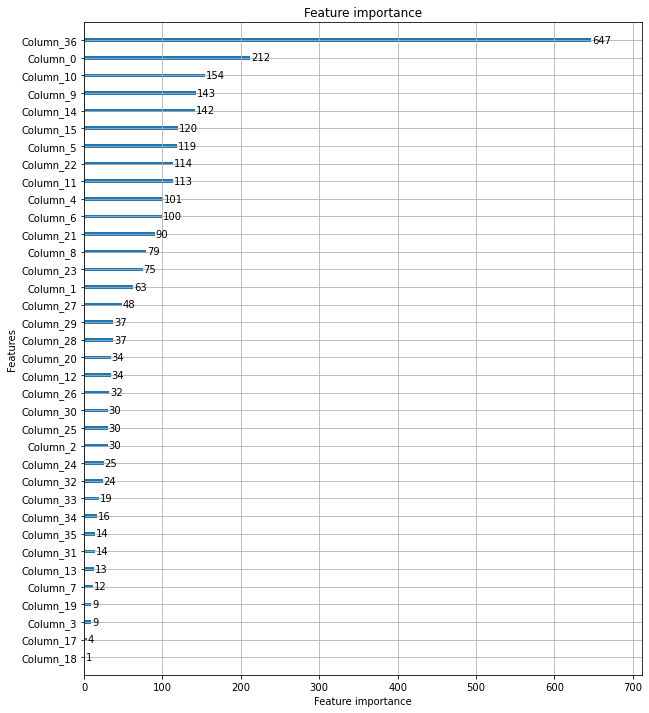

In [68]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_reg, ax=ax)

In [69]:
n = pd.DataFrame({'target_pred':target_pred})

In [70]:
n.target_pred.describe()

count    6041.000000
mean        0.377243
std         0.347923
min        -0.188279
25%         0.032950
50%         0.306752
75%         0.712871
max         1.196463
Name: target_pred, dtype: float64

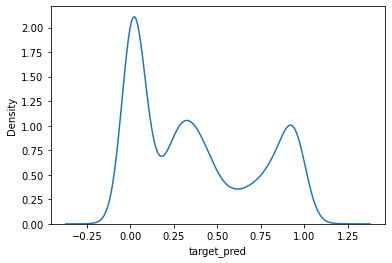

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.kdeplot(n.target_pred)
plt.show()

In [72]:
# 513
n.target_pred.sort_values(ascending = False).iloc[510:521]

3731    0.939081
1743    0.939081
5386    0.939062
3478    0.938896
2666    0.938896
397     0.938844
654     0.938755
2277    0.938550
2652    0.938519
4423    0.938391
4455    0.938071
Name: target_pred, dtype: float64

# Model Saveing

In [497]:
import joblib

joblib.dump(lgbm_clf, 'model_saving/lgbm_task1_part_iter_svm.pkl')
joblib.dump(lgbm_reg, 'model_saving/lgbm_task2_part_iter_svm.pkl')

['model_saving/lgbm_task2_part_iter_svm.pkl']

# Submission to CSV

In [73]:
target_pred_category = np.array([0 if i < 0.939 else 1 for i in target_pred])
pd.DataFrame({'ID': test_id, 'Y_LABEL': target_pred_category}).to_csv('predict/smote/al_total_tomek_939.csv', index=False)